# Number Recognition
- step:1-import datascience libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** step-1:Loading Dataset

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits() #which contain dataset
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

# step-3:data preprocessing
- thresholding(binarizing(max and min))
- normalizing(0-1)
- extracting dependent and independent variables

In [5]:
x =digits['data'] #independ
y= digits['target'] #dependent(not necessary to maintain a shape)
x.shape,y.shape

((1797, 64), (1797,))

In [6]:
y[0]

0

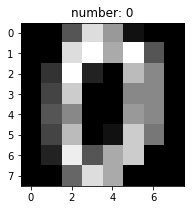

In [7]:
plt.figure(figsize=(3,3))
img=x[0:1]
plt.imshow(img.reshape((8,8)),cmap='gray')
plt.title('number: '+str(y[0]))
plt.show()

# thresholding
> any values greater than 7 replace with max value and if less than 7 replace with min value

In [8]:
cond1=x>=7 # find values greater than or equal to 7
cond2=x<=7 # find values less than or equal to 7
x_t=x.copy() # copy array as x_t
x_t[cond1]= x_t.max()  # if cond1 satisfy replace with max
x_t[cond2]= x_t.min()  # if cond2 satisfy replace with min

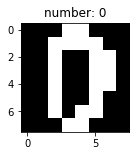

In [9]:
plt.figure(figsize=(2,2))
img=x_t[0:1]
plt.imshow(img.reshape((8,8)),cmap='gray')
plt.title('number: '+str(y[0]))
plt.show()

In [10]:
x_t=x_t/x_t.max() # normalizing(0-1)

In [11]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_t,y,test_size=0.2,random_state=0)

/home/saisrikar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

> **step:7-Building machine learning model**
- Logistic regression,KNearestNeighbour,Support Vector Machine,Decision Tree, Random Forest

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
model_log = LogisticRegression(C=10.0) # creating lr model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C=10.0,kernel='rbf')
model_dt =DecisionTreeClassifier()
model_rf = RandomForestClassifier(n_estimators=100) 

# Training Model

In [15]:
model_log.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
print('models trained succesfully!!!')

models trained succesfully!!!




> step:8-Model Evaluation
- confusion matrix
- classification model

In [16]:
y_pred_log=model_log.predict(x_test)
y_pred_knn=model_knn.predict(x_test)
y_pred_svm=model_svm.predict(x_test)
y_pred_dt=model_dt.predict(x_test)
y_pred_rf=model_rf.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_rf = confusion_matrix(y_test,y_pred_rf)

In [19]:
cm_log

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 30,  1,  0,  1,  1,  0,  0,  1,  1],
       [ 0,  0, 34,  1,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 26,  0,  1,  0,  0,  0,  2],
       [ 0,  1,  0,  0, 28,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  2, 36,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  1],
       [ 0,  4,  1,  1,  1,  0,  2,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 38]])

In [20]:
import seaborn as sm

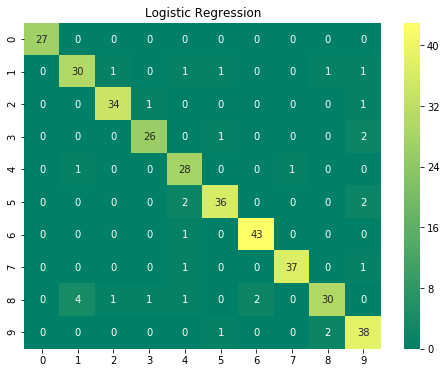

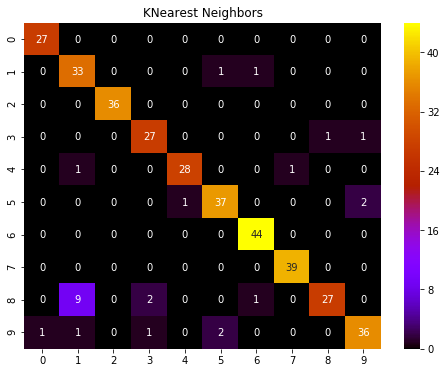

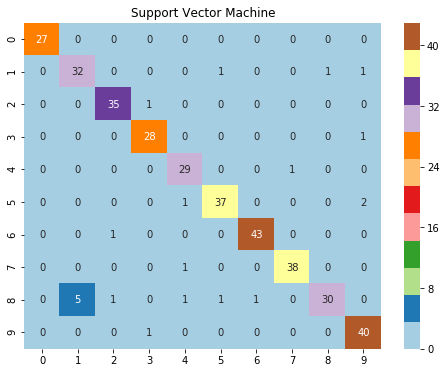

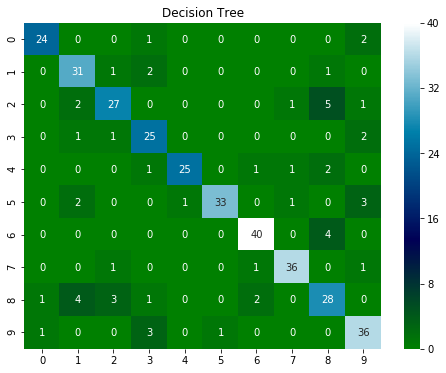

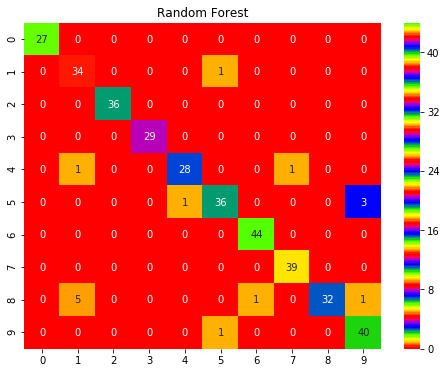

In [21]:
plt.figure(figsize=(8,6))
sm.heatmap(cm_log,annot=True,cmap='summer')
plt.title('Logistic Regression')
plt.show()

plt.figure(figsize=(8,6))
sm.heatmap(cm_knn,annot=True,cmap='gnuplot')
plt.title('KNearest Neighbors')
plt.show()

plt.figure(figsize=(8,6))
sm.heatmap(cm_svm,annot=True,cmap='Paired')
plt.title('Support Vector Machine')
plt.show()

plt.figure(figsize=(8,6))
sm.heatmap(cm_dt,annot=True,cmap='ocean')
plt.title('Decision Tree')
plt.show()

plt.figure(figsize=(8,6))
sm.heatmap(cm_rf,annot=True,cmap='prism')
plt.title('Random Forest')
plt.show()





In [22]:
cr_log = classification_report(y_test,y_pred_log)
print('\n'+'='*20+'Logistic Regression'+"="*20+'\n')
print(cr_log)

cr_knn = classification_report(y_test,y_pred_knn)
print('\n'+'='*20+'KNearest neighbor'+"="*20+'\n')
print(cr_knn)

cr_svm = classification_report(y_test,y_pred_svm)
print('\n'+'='*20+'Support Vector Machine'+"="*20+'\n')
print(cr_svm)

cr_dt = classification_report(y_test,y_pred_dt)
print('\n'+'='*20+'Decision Tree'+"="*20+'\n')
print(cr_dt)

cr_rf = classification_report(y_test,y_pred_rf)
print('\n'+'='*20+'Random forest'+"="*20+'\n')
print(cr_rf)



====================Logistic Regression====================

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.86      0.86      0.86        35
          2       0.94      0.94      0.94        36
          3       0.93      0.90      0.91        29
          4       0.82      0.93      0.87        30
          5       0.92      0.90      0.91        40
          6       0.96      0.98      0.97        44
          7       0.97      0.95      0.96        39
          8       0.91      0.77      0.83        39
          9       0.84      0.93      0.88        41

avg / total       0.92      0.91      0.91       360


====================KNearest neighbor====================

             precision    recall  f1-score   support

          0       0.96      1.00      0.98        27
          1       0.75      0.94      0.84        35
          2       1.00      1.00      1.00        36
          3       0.90    

# test your model

In [23]:
import cv2

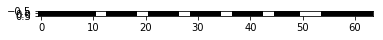

In [26]:
#step-1:read and convert into gray scale
img=cv2.imread('/home/saisrikar/Pictures/index.png',0)
#step-2:resize image to 8x8
img_re=cv2.resize(img,(8,8))
#step-3:inverse thresholding
ret,thresh=cv2.threshold(img_re,127,255,cv2.THRESH_BINARY_INV)
#step-4:normalizing(0-1)
test=thresh/255.0
#step-5:reshape(1,64)
test=test.reshape((1,64))
plt.imshow(test,cmap='gray')
plt.show()

In [27]:
print('prediction with random forest:',model_rf.predict(test))

prediction with random forest: [1]


In [33]:
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7),3)
    _,th3 = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,21,7)
    im2, contours, hierarchy = cv2.findContours(th3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    areas = [cv2.contourArea(c) for c in contours]
    ix = np.where(np.array(areas) > 300)[0]
    result = np.array([1,0,0,0,0,0,0,0,0,0])
    for i in ix:
        cnt = contours[i]
        xr,yr,wr,hr = cv2.boundingRect(cnt)
        if xr< 20 :
            xr = 25


        if yr < 20:
            yr = 25


        cv2.rectangle(img,(xr-10,yr-10),(xr+wr+10,yr+hr+10), (0,255,0),2)
        roi = th3[yr-20:yr+hr+20, xr-20:xr+wr+20]
        
        roi_re=cv2.resize(roi,(8,8))
        g = roi_re.reshape(1,64).astype('float32')
        g = g/255
        result=  model_rf.predict(g)
        #print(result)
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img,'Number: '+str(result),(xr-10,yr-10), font, 0.4, (255,0,0), 1, cv2.LINE_AA)


    cv2.imshow('Threshold',th3)
   cv2.imshow('orginal',img)

    if cv2.waitKey(41) & 0xff == ord('q'):
        break
        
    
    
cap.release()    
cv2.destroyAllWindows()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 37)

In [34]:
cap.release()    
cv2.destroyAllWindows()

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1527005194613/work/modules/highgui/src/window.cpp:630: error: (-2) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Carbon support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function cvDestroyAllWindows
